### Importações de bibliotecas e carregamento dos dados

In [2]:
# Importações de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
file_path = '../data/raw/desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)

## Fase 2: Continuação - EDA Detalhada

### Distribuições principais

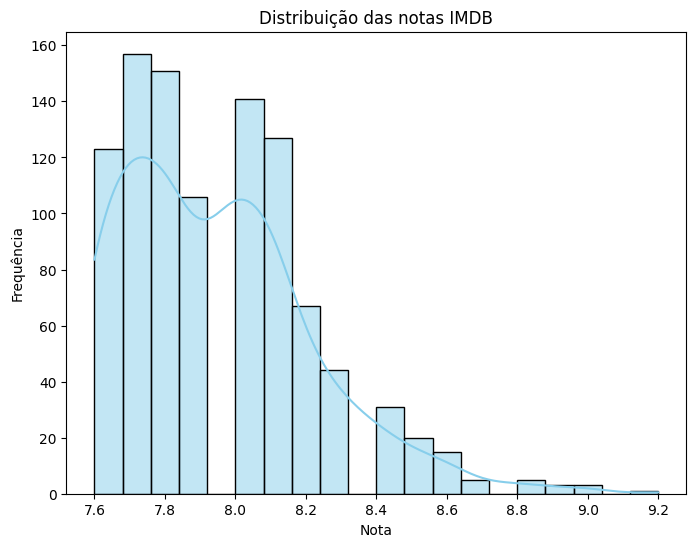

In [4]:
# Distribuição das notas IMDB + KDE
plt.figure(figsize=(8,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color="skyblue")
plt.title("Distribuição das notas IMDB")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

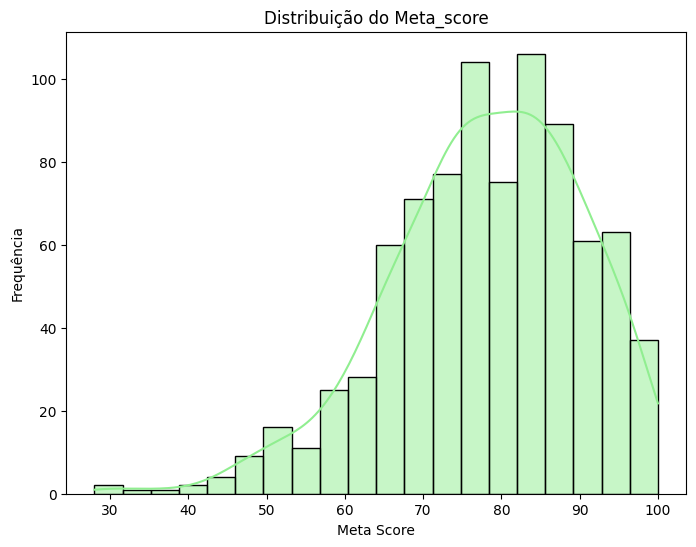

In [5]:
# Distribuição do Meta_score
plt.figure(figsize=(8,6))
sns.histplot(df['Meta_score'].dropna(), bins=20, kde=True, color="lightgreen")
plt.title("Distribuição do Meta_score")
plt.xlabel("Meta Score")
plt.ylabel("Frequência")
plt.show()

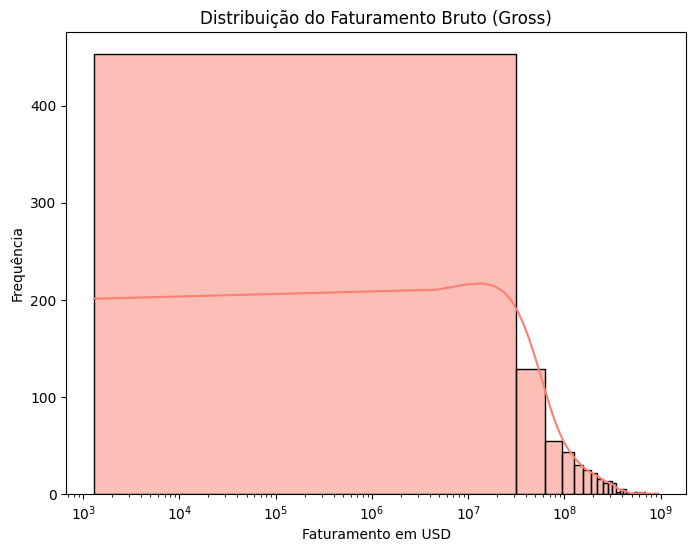

In [6]:
# Distribuição do faturamento bruto (Gross)
df['Gross'] = df['Gross'].astype(str).str.replace(',', '').astype(float)

plt.figure(figsize=(8,6))
sns.histplot(df['Gross'].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribuição do Faturamento Bruto (Gross)")
plt.xlabel("Faturamento em USD")
plt.ylabel("Frequência")
plt.xscale("log")
plt.show()

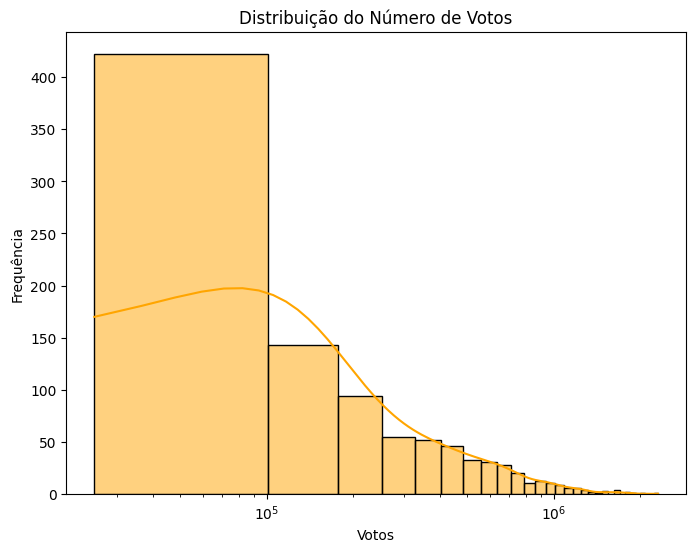

In [7]:
# Distribuição do número de votos
plt.figure(figsize=(8,6))
sns.histplot(df['No_of_Votes'], bins=30, kde=True, color="orange")
plt.title("Distribuição do Número de Votos")
plt.xlabel("Votos")
plt.ylabel("Frequência")
plt.xscale("log")  # votos muito assimétricos, o log ajuda na visualização!!
plt.show()

### Correlação numéricas

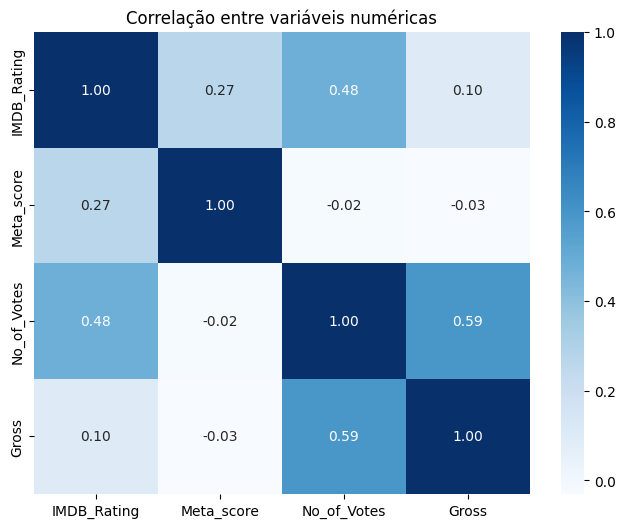

In [8]:
plt.figure(figsize=(8,6))
corr = df[['IMDB_Rating','Meta_score','No_of_Votes','Gross']].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.show()


### Relações entre Genre e Gross/Rating

In [9]:
# Gênero principal (primeira categoria antes da vírgula)
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])

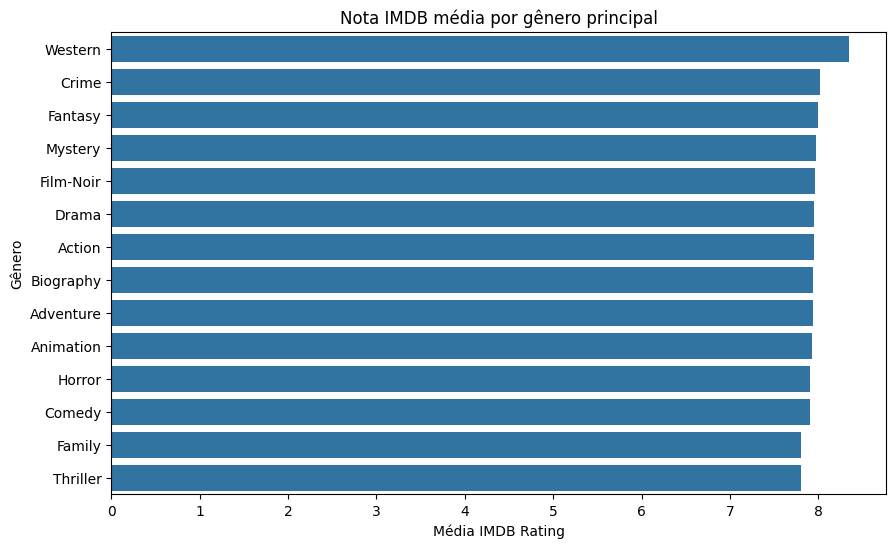

In [10]:
# Rating médio por gênero
rating_genre = df.groupby("Main_Genre")['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rating_genre.values, y=rating_genre.index)
plt.title("Nota IMDB média por gênero principal")
plt.xlabel("Média IMDB Rating")
plt.ylabel("Gênero")
plt.show()

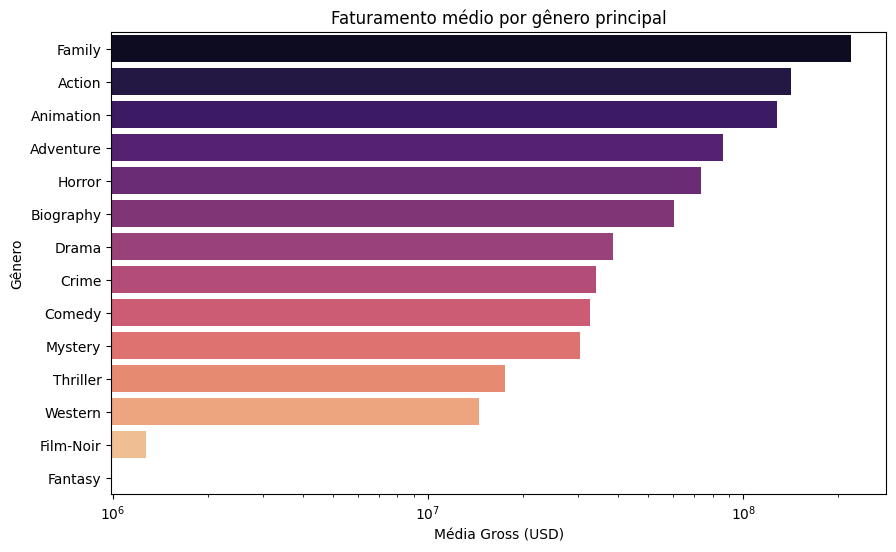

In [11]:
# Faturamento médio por gênero
gross_genre = df.groupby("Main_Genre")['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=gross_genre.values, y=gross_genre.index, palette="magma", hue=gross_genre.index,
            dodge=False, legend=False)
plt.title("Faturamento médio por gênero principal")
plt.xlabel("Média Gross (USD)")
plt.ylabel("Gênero")
plt.xscale("log")
plt.show()

### Diretores e atores mais frequentes e lucrativos

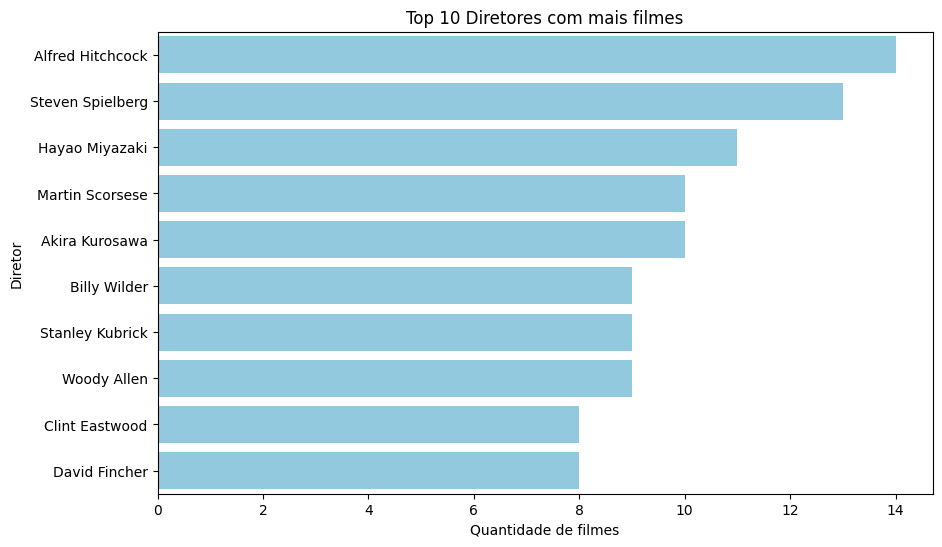

In [12]:
# Top diretores por nº de filmes
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, color="skyblue")
plt.title("Top 10 Diretores com mais filmes")
plt.xlabel("Quantidade de filmes")
plt.ylabel("Diretor")
plt.show()

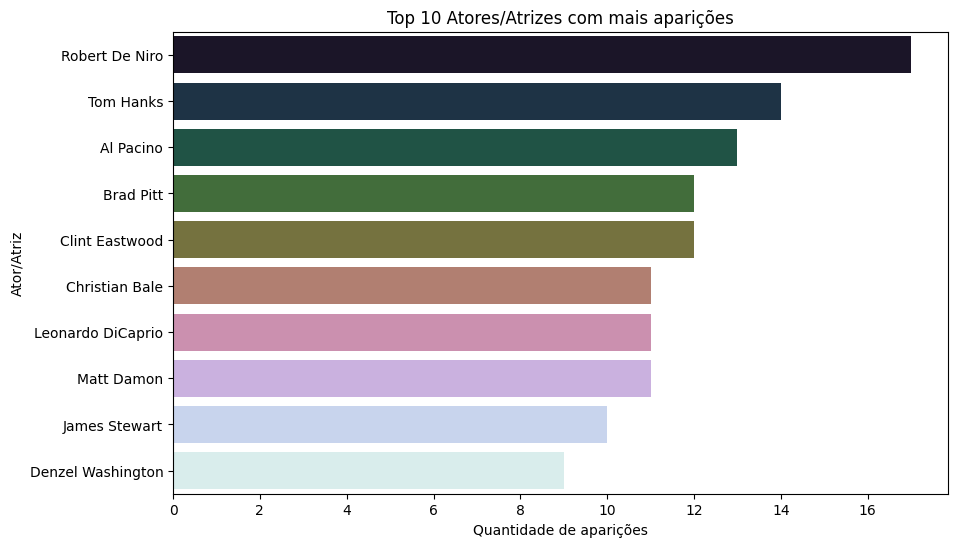

In [13]:
# Top atores por nº de aparições
top_actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="cubehelix", hue=top_actors.index,
            dodge=False, legend=False)
plt.title("Top 10 Atores/Atrizes com mais aparições")
plt.xlabel("Quantidade de aparições")
plt.ylabel("Ator/Atriz")
plt.show()

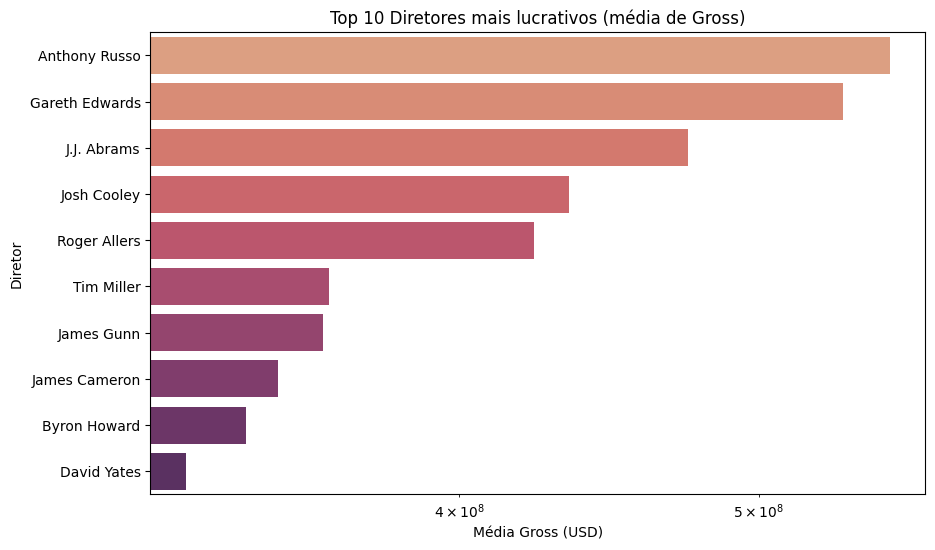

In [14]:
# Diretores mais lucrativos (média de Gross)
director_gross = df.groupby("Director")['Gross'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=director_gross.values, y=director_gross.index, palette="flare", hue=director_gross.index, dodge=False, legend=False)
plt.title("Top 10 Diretores mais lucrativos (média de Gross)")
plt.xlabel("Média Gross (USD)")
plt.ylabel("Diretor")
plt.xscale("log")
plt.show()

### Outliers no faturamento e no numero de votos

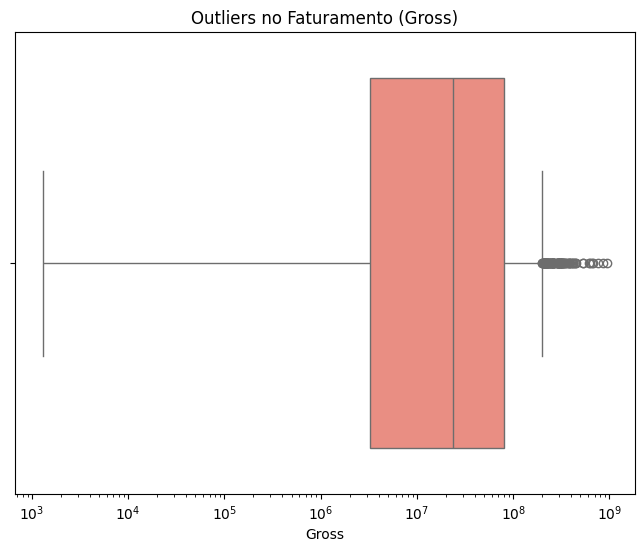

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Gross'], color="salmon")
plt.title("Outliers no Faturamento (Gross)")
plt.xscale("log")
plt.show()

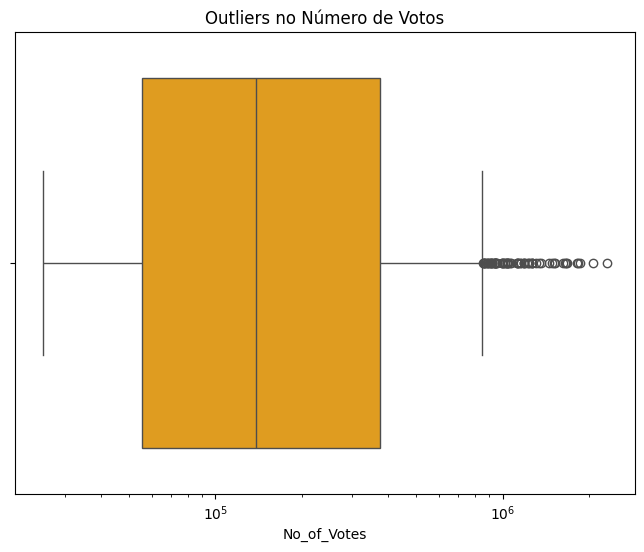

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['No_of_Votes'], color="orange")
plt.title("Outliers no Número de Votos")
plt.xscale("log")
plt.show()

### Evolução temporal

In [17]:
# Converter Released_Year para numérico
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

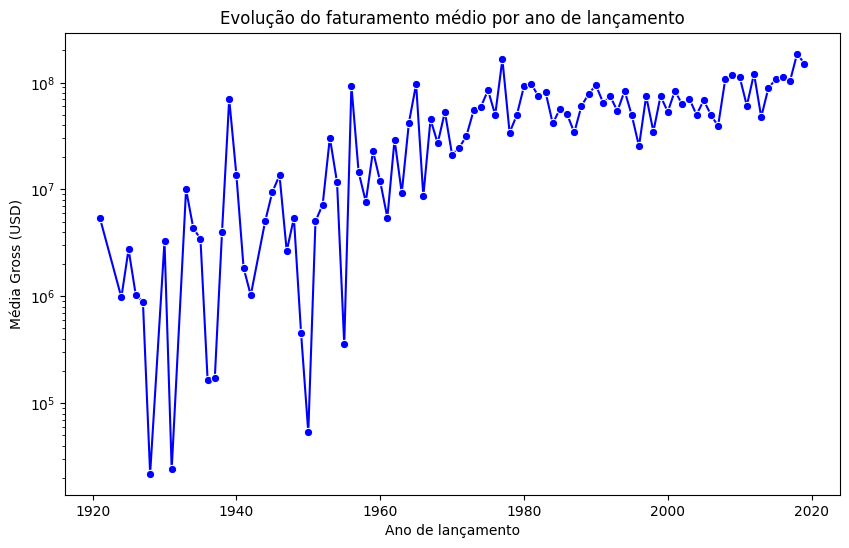

In [18]:
# ano de lançamento × Gross médio

yearly_gross = df.groupby("Released_Year")['Gross'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_gross.index, y=yearly_gross.values, color="blue", marker="o")
plt.title("Evolução do faturamento médio por ano de lançamento")
plt.xlabel("Ano de lançamento")
plt.ylabel("Média Gross (USD)")
plt.yscale("log")
plt.show()